Описание данных:
1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st
import math
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

1) Загружаем файл HR.csv в pandas dataframe

In [2]:
df = pd.read_csv('HR.csv', sep=',')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
# Проверим заодно нет ли нулевых данных и посмотрим типы
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


2) Рассчитаем основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение)

In [4]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
df.mode().loc[[0]] # Дополним данные выше модами

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low


3) Рассчитать и визуализировать корреляционную матрицу для количественных переменных. Определить две самые скоррелированные и две наименее
скоррелированные переменные

In [6]:
# Для удобства сделаем датафрейм только с количественными переменными (quantitative variables)
df_q_var = df.select_dtypes(include=['float64', 'int64'])
df_q_var

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0
...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0
14995,0.37,0.48,2,160,3,0,1,0
14996,0.37,0.53,2,143,3,0,1,0
14997,0.11,0.96,6,280,4,0,1,0


In [7]:
# Расчитаем корреляционную матрицу
corr_matrix = df_q_var.corr()
corr_matrix

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


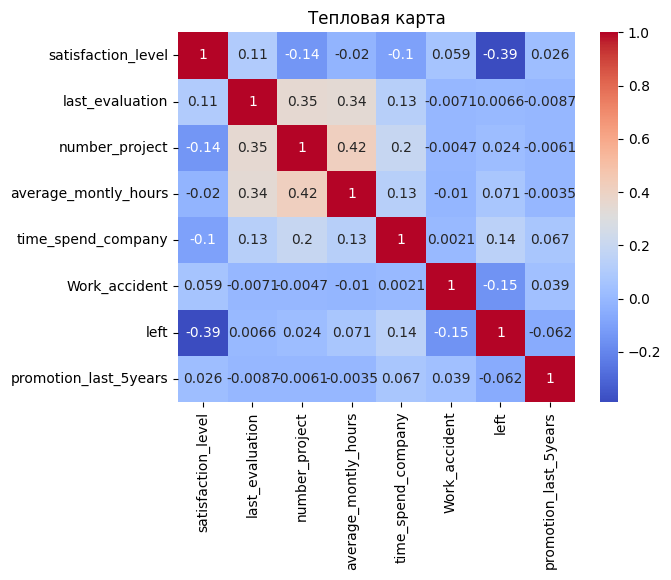

In [8]:
# И визуализируем её с помощью тепловой карты
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Тепловая карта')
plt.show()

In [9]:
# Нахождение двух самых скоррелированных переменных
max_corr = corr_matrix.unstack().sort_values(ascending=False)
max_corr[max_corr < 1].iloc[[0]]

number_project  average_montly_hours    0.417211
dtype: float64

In [10]:
# Нахождение двух наименее скоррелированных переменных
min_corr = corr_matrix.unstack().sort_values()
min_corr[min_corr > -1].iloc[[0]]

left  satisfaction_level   -0.388375
dtype: float64

4) Рассчитать сколько сотрудников работает в каждом департаменте

In [11]:
df['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

5) Показать распределение сотрудников по зарплатам.

<ipython-input-12-8800cf6b1d40>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(df['salary'], palette='pastel')


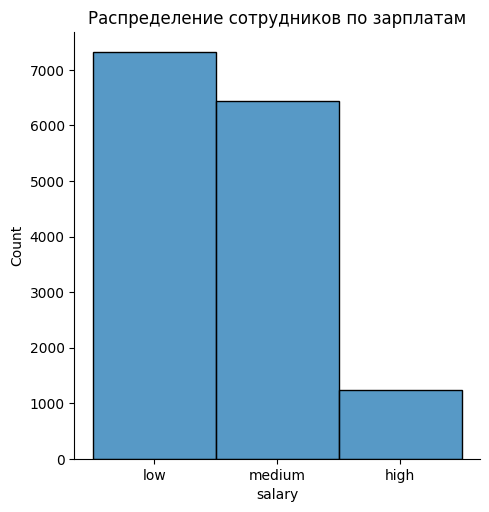

In [12]:
sns.displot(df['salary'], palette='pastel')
plt.title('Распределение сотрудников по зарплатам')
plt.show()

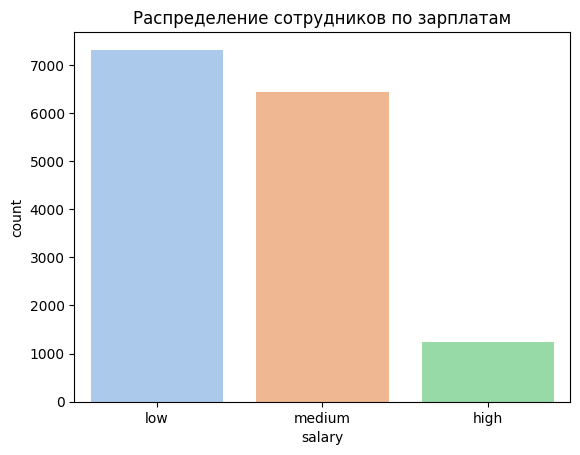

In [13]:
# Второй способ
grouped_data = df.groupby('salary').size().reset_index(name='count')
salary_order = df['salary'].unique()
sns.barplot(x='salary', y='count', data=grouped_data, palette='pastel', order=salary_order)
plt.title(f'Распределение сотрудников по зарплатам')
plt.show()

6) Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности

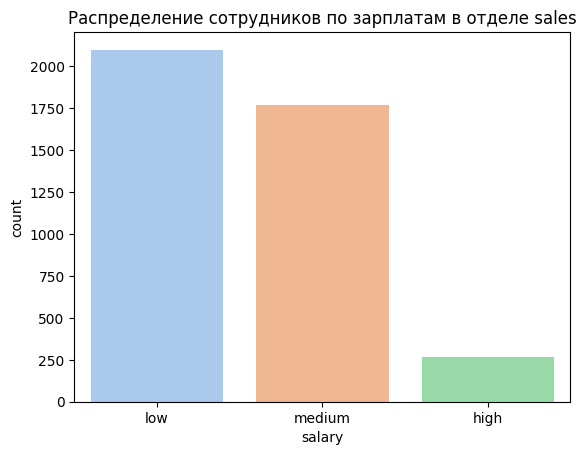

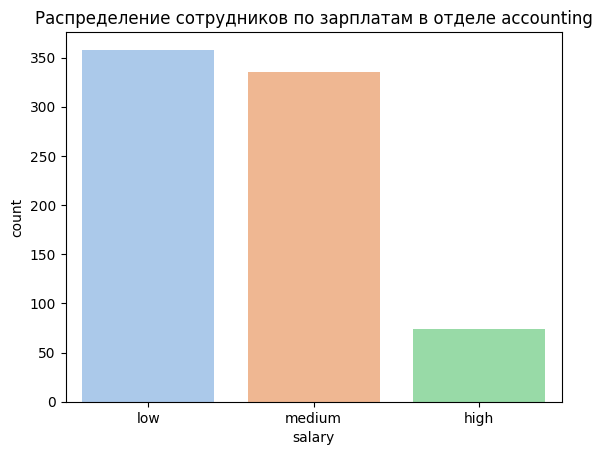

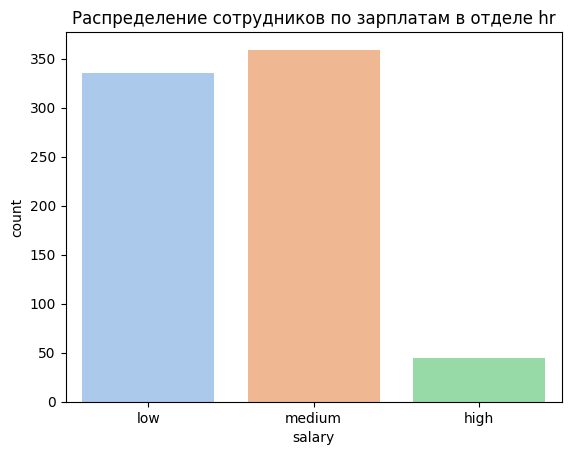

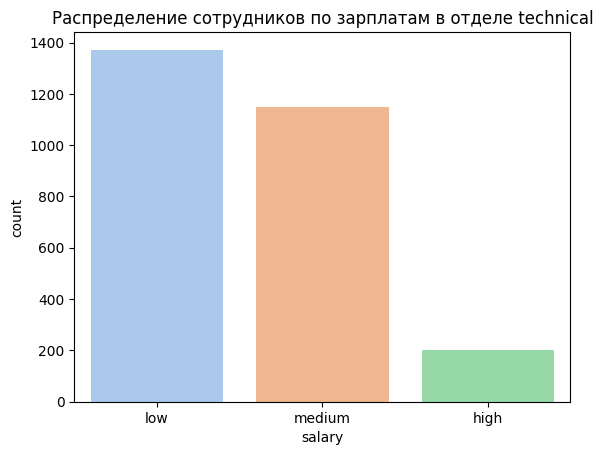

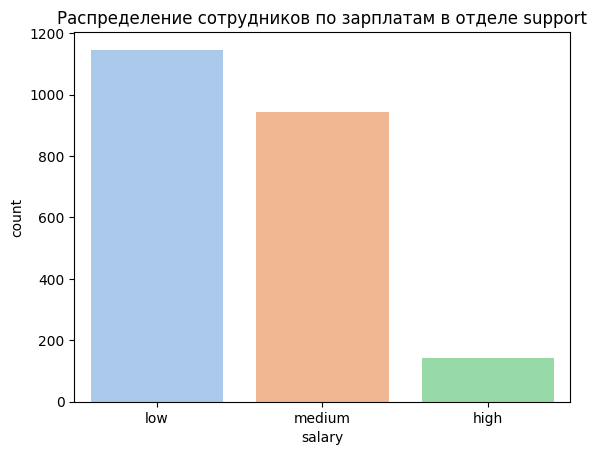

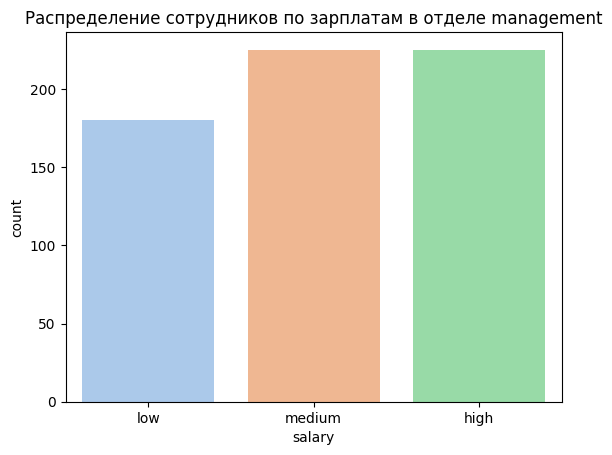

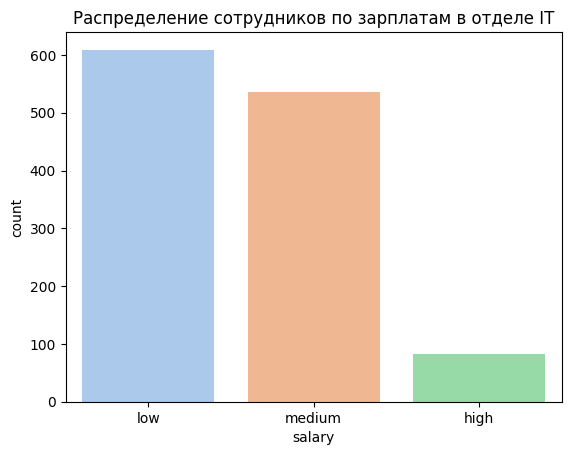

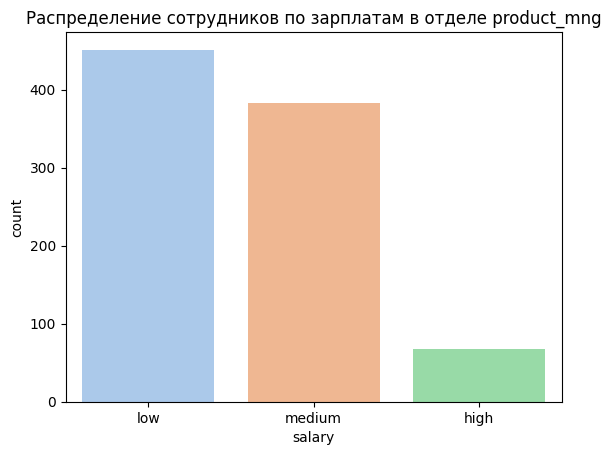

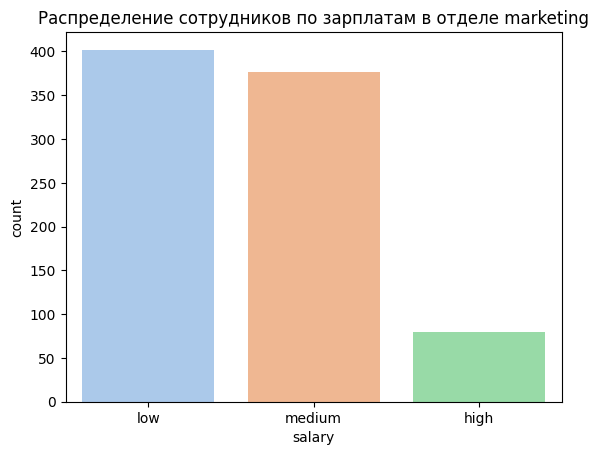

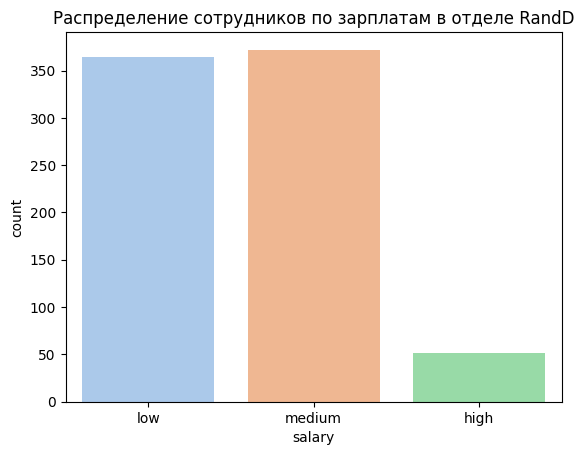

In [14]:
# Получим список департаментов
departments = df['department'].unique()

# СВизуализируем распределение зарплат для каждого департамента
for department in departments:
    department_data = df[df['department'] == department]
    grouped_data = department_data.groupby('salary').size().reset_index(name='count')

    sns.barplot(x='salary', y='count', data=grouped_data, palette='pastel', order=salary_order)
    plt.title(f'Распределение сотрудников по зарплатам в отделе {department}')
    plt.show()

7) Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом

In [15]:
# Подготовим небольшие датафреймы
hours_and_salary = df[['salary', 'average_montly_hours']].copy()
hours_low_salary = hours_and_salary[hours_and_salary['salary']=='low']
hours_medium_salary = hours_and_salary[hours_and_salary['salary']=='medium']
hours_high_salary = hours_and_salary[hours_and_salary['salary']=='high']

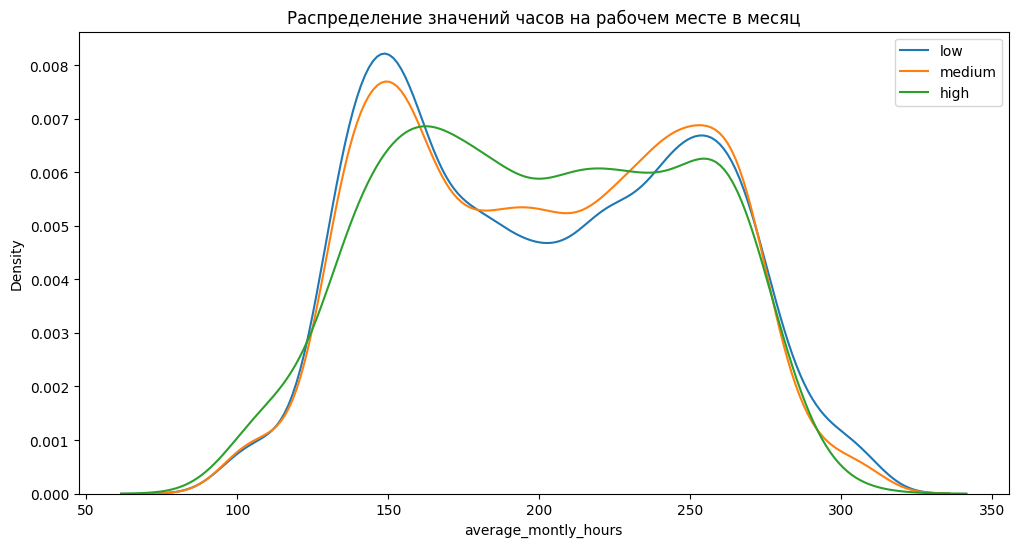

In [16]:
# Визуализация распределения значений
fig, ax = plt.subplots(figsize=(12,6))

sns.kdeplot(hours_low_salary['average_montly_hours'], ax=ax, label='low')
sns.kdeplot(hours_medium_salary['average_montly_hours'], ax=ax, label='medium')
sns.kdeplot(hours_high_salary['average_montly_hours'], ax=ax, label='high')
ax.set_title('Распределение значений часов на рабочем месте в месяц')
plt.legend()
plt.show()

In [17]:
# На графиках выше видно, что распределения не являются нормальными, но убедимся в этом на основе цифр
def normality_test(sample):
    stat, p = st.shapiro(sample)
    alpha = 0.05

    if p > alpha:
        print(f"Распределение для выборки не отклоняется от нормального на уровне значимости {alpha}")
    else:
        print(f"Распределение для выборки отклоняется от нормального на уровне значимости {alpha}")

normality_test(hours_low_salary['average_montly_hours'])
normality_test(hours_medium_salary['average_montly_hours'])
normality_test(hours_high_salary['average_montly_hours'])

Распределение для выборки отклоняется от нормального на уровне значимости 0.05
Распределение для выборки отклоняется от нормального на уровне значимости 0.05
Распределение для выборки отклоняется от нормального на уровне значимости 0.05


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


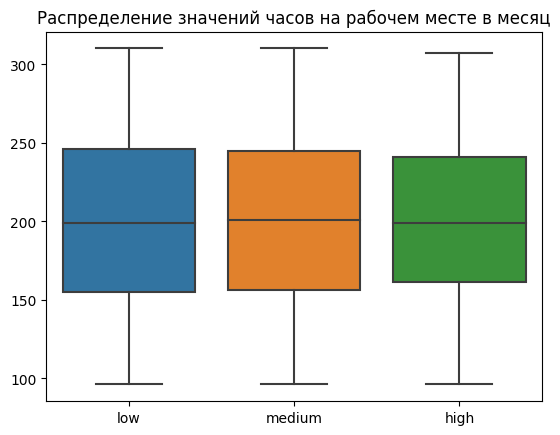

In [18]:
sns.boxplot([hours_low_salary['average_montly_hours'], hours_medium_salary['average_montly_hours'], hours_high_salary['average_montly_hours']])
plt.xticks([0, 1, 2], ['low', 'medium', 'high'])
plt.title('Распределение значений часов на рабочем месте в месяц')
plt.show()

Исходя из представленных графиков, нельзя сказать, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом, но не будем доверять глазам и посмотрим на числа:


In [19]:
# Нулевая гипотеза - Время, проведенное на работе, не отличается для сотрудников с низким {low} и высоким {high} окладами.
# Проверка гипотезы с помощью двухвыборочного t-теста
# Выберем пороговый уровень статистической значимости = 0.05

t_stat, p_val = st.ttest_ind(hours_low_salary['average_montly_hours'], hours_high_salary['average_montly_hours'], equal_var=False)
print(f't-статистика: {t_stat:0.3f}')
print(f'p-value: {p_val:0.3f}')
if p_val < 0.05:
    print('Гипотеза отвергается')
    if hours_low_salary['average_montly_hours'].mean() < hours_high_salary['average_montly_hours'].mean():
      print('Сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом')
    else:
      print('Сотрудники с высоким окладом проводят на работе меньше времени, чем сотрудники с низким окладом')
else:
    print('Гипотеза не отвергается')
    print('Нет статистически значимых различий в количестве времени на работе между сотрудниками с низким и высоким окладом')

t-статистика: 0.762
p-value: 0.446
Гипотеза не отвергается
Нет статистически значимых различий в количестве времени на работе между сотрудниками с низким и высоким окладом


8) Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):
* Доля сотрудников с повышением за последние 5 лет
* Средняя степень удовлетворенности
* Среднее количество проектов

In [27]:
# Сделаем два датафрейма с уволившимися и действующими сотрудниками

df_left = df[df['left']==1]
df_stay = df[df['left']==0]

In [52]:
print(f"Доля уволившихся сотрудников с повышением за последние 5 лет: {df_left['promotion_last_5years'].mean():0.3f}")
print(f"Доля не уволившихся сотрудников с повышением за последние 5 лет: {df_stay['promotion_last_5years'].mean():0.3f}")

Доля уволившихся сотрудников с повышением за последние 5 лет: 0.005
Доля не уволившихся сотрудников с повышением за последние 5 лет: 0.026


In [48]:
print(f"Средняя степень удовлетворенности среди уволившихся сотрудников: {df_left['satisfaction_level'].mean():0.3f}")
print(f"Средняя степень удовлетворенности среди не уволившихся сотрудников: {df_stay['satisfaction_level'].mean():0.3f}")

Средняя степень удовлетворенности среди уволившихся сотрудников: 0.440
Средняя степень удовлетворенности среди не уволившихся сотрудников: 0.667


In [51]:
print(f"Среднее количествопроектов среди уволившихся сотрудников: {df_left['number_project'].mean():0.3f}")
print(f"Среднее количествопроектов среди не уволившихся сотрудников: {df_stay['number_project'].mean():0.3f}")

Среднее количествопроектов среди уволившихся сотрудников: 3.856
Среднее количествопроектов среди не уволившихся сотрудников: 3.787


9) Разделить данные на тестовую и обучающую выборки.
Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary).
Оценить качество модели на тестовой выборки

In [53]:
# Здесь поможет уже готовый датафрейм, содержащий только числовые знаения
df_q_var.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0


In [56]:
# Разбиваем на тестовые и обучающие выборки
X = df_q_var[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']]
y = df_q_var['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [60]:
# Строим модель LDA
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [62]:
y_pred = model.predict(X_test)

In [67]:
# Оценка качества модели
accuracy = model.score(X_test, y_test)

print(f"Точность модели LDA: {accuracy:0.3f}")

Точность модели LDA: 0.756


10) Загрузить jupyter notebook с решение на github и прислать ссылку